In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/macrodata.csv', index_col="Unnamed: 0", parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


# Programa este método. 


In [9]:
def holts(X, alpha, beta, gamma, L, data):
  n = len(X)
  l = [X[0]]
  B = [0]
  S = [0]*L
  Y = [X[0]]

  for i in range(1, n): 
    li = alpha*X[i] + (1-alpha)*l[i-1]
    l.append(li)
    bi = (1-beta)*B[-1] + beta*(l[i] - l[i-1])
    B.append(bi)

    if i >= L:
      si = (1-gamma)*S[i-L] + gamma*(B[i] - B[i-1])
      S.append(si)

      yi = li + bi * si
      Y.append(yi)
    else: 
      yi = li + bi * S[i]
      Y.append(yi)
    

  data["S_t"] = S
  data["B_t"] = B
  data["L_t"] = L
  return (Y)

In [10]:
df['Holt_gdp'] = holts(df['realgdp'], 0.1, 0.2, 1, 10,df)

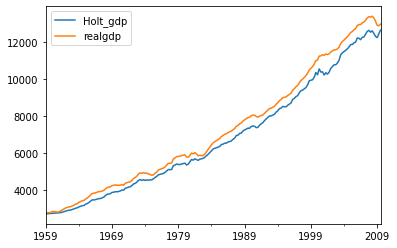

In [11]:
df[['Holt_gdp', 'realgdp']].plot()

# Mide el error

In [12]:
def error_rmse(df, colA, colB, init_step): 
    valid_df = df[init_step:]
    return np.sqrt(np.mean(np.square(valid_df[colA] - valid_df[colB])))

def error_l1(df, colA, colB, init_step): 
    valid_df = df[init_step:]
    return np.mean(np.abs(valid_df[colA] - valid_df[colB]))

In [14]:
print("RMSE: ",error_rmse(df, 'realgdp', 'Holt_gdp', 100))
print("Error L1: ",error_l1(df, 'realgdp', 'Holt_gdp', 100))

RMSE:  626.3060589386708
Error L1:  604.2422831953655


# Grafica st, bt, ℓ𝑡.

In [16]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,S_t,B_t,L_t,Holt_gdp
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,0.000000,0.000000,10,2710.349000
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,0.000000,1.369040,10,2717.194200
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,0.000000,2.261108,10,2723.023580
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,0.000000,3.052495,10,2729.241622
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,0.000000,4.811143,10,2741.087360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,-4.937203,72.861642,10,12486.851811
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,-8.665619,64.196023,10,12319.819798
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,-11.853366,52.342657,10,12260.610589
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,-10.059397,42.283260,10,12457.748849


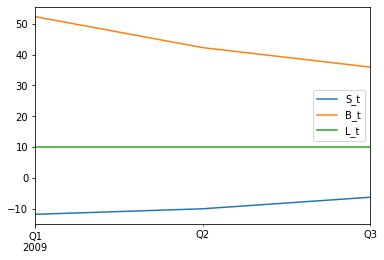

In [17]:
df[["S_t", "B_t", "L_t"]][200:400].plot()